<a id="plot_vizualization"></a>
### Plot Vizualization

In this section there is given a visual representation of information found and written in the JSON file.

#### Usage Instructions

1. Create file named as the variable *'data_filename'* in **class Data** in [Text Vizualization](#text_vizualization) in JSON format. There is default value of the variable which can be changed.

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import sys, os

module_path = os.path.abspath(os.path.join('..', 'src'))
if module_path not in sys.path:
    sys.path.append(module_path)

from utils import now_timestamp, sorted_tuples_list
sys.path.append(os.path.abspath(os.path.join('..')))
from src.data_serializer import Data
load_dotenv()

True

In [140]:
input_data_filename = os.getenv("STATS_TO_VISUALIZE")
timestamp = input_data_filename.split("flight_soft_sims_data_")[1].split(".json")[0]
folder_to_save_plots = os.getenv("SAVE_GRAPHS_BASE_FOLDERNAME") + "/" + timestamp
width = 0.4

In [120]:
from pathlib import Path
Path(folder_to_save_plots).mkdir(parents=True, exist_ok=True)

In [121]:
data = Data()

In [122]:
sim_uav_popularity_list = sorted_tuples_list(data.uav_sim_popularities)
simulators_data = list(
    map(
        lambda tup: (
            tup[0],
            tup[1],
            next(filter(lambda x: x[0] == tup[0], sim_uav_popularity_list))[1],
        ),
        sorted_tuples_list(data.sim_popularities),
    )
)
simulators_data = [(tup[0].value, tup[1], tup[2]) for tup in simulators_data]

flight_softwares_uav_popularity_list = sorted_tuples_list(
    data.uav_software_popularities
)
software_data = list(
    map(
        lambda tup: (
            tup[0],
            tup[1],
            next(
                filter(lambda x: x[0] == tup[0], flight_softwares_uav_popularity_list)
            )[1],
        ),
        sorted_tuples_list(data.software_popularities),
    )
)
software_data = [(tup[0].value, tup[1], tup[2]) for tup in software_data]


simulators_df = pd.DataFrame(
    simulators_data, columns=["Simulator", "Overall Mentions", "UAV Mentions"]
)
software_df = pd.DataFrame(
    software_data, columns=["Software", "Overall Mentions", "UAV Mentions"]
)




In [123]:
def get_software_in_simulators():
    simulator_totals = {
        sim: sum(
            softwares.get(sim, 0) for softwares in data.soft_sim_distributions.values()
        )
        for sim in data.Simulator
    }

    software_in_simulators = {"Simulator": [sim.value for sim in data.Simulator]}
    for software in data.soft_sim_distributions:
        software_in_simulators[f"{software.value} (%)"] = []

    for sim in data.Simulator:
        for software, software_data in data.soft_sim_distributions.items():
            percentage = (
                (software_data.get(sim, 0) / simulator_totals[sim]) * 100
                if simulator_totals[sim] > 0
                else 0
            )
            software_in_simulators[f"{software.value} (%)"].append(round(percentage))

    return software_in_simulators


def get_software_in_simulators_absolute():
    software_in_simulators = {"Simulator": [sim.value for sim in data.Simulator]}

    for software in data.soft_sim_distributions:
        software_in_simulators[f"{software.value} (Count)"] = []

    for sim in data.Simulator:
        for software, software_data in data.soft_sim_distributions.items():
            count = software_data.get(sim, 0)
            software_in_simulators[f"{software.value} (Count)"].append(count)

    return software_in_simulators


def get_simulators_in_software():
    software_totals = {
        software: sum(sim_data.values())
        for software, sim_data in data.soft_sim_distributions.items()
    }

    simulators_in_software = {
        "Software": [software.value for software in data.Flight_Software]
    }

    for sim in data.Simulator:
        simulators_in_software[f"{sim.value} (in %)"] = []

    for software, sim_data in data.soft_sim_distributions.items():
        for sim in data.Simulator:
            percentage = (
                (sim_data.get(sim, 0) / software_totals[software]) * 100
                if software_totals[software] > 0
                else 0
            )
            simulators_in_software[f"{sim.value} (in %)"].append(round(percentage))

    return simulators_in_software


def get_simulators_in_software_absolute():
    simulators_in_software = {
        "Software": [software.value for software in data.Flight_Software]
    }

    for sim in data.Simulator:
        simulators_in_software[f"{sim.value} (Count)"] = []

    for _, sim_data in data.soft_sim_distributions.items():
        for sim in data.Simulator:
            count = sim_data.get(sim, 0)
            simulators_in_software[f"{sim.value} (Count)"].append(count)

    return simulators_in_software


In [124]:
def bar_chart_flight_software_by_overall_and_uav_mentions():
    plt.figure(figsize=(8, 5))
    x = np.arange(len(software_df["Software"]))
    plt.bar(
        x - width / 2, software_df["Overall Mentions"], width, label="Overall Mentions"
    )
    plt.bar(x + width / 2, software_df["UAV Mentions"], width, label="UAV Mentions")

    plt.xticks(x, software_df["Software"], rotation=45)
    plt.ylabel("Mentions (log scale)")
    plt.yscale("log")
    plt.title("Flight Control Software: Overall vs UAV Mentions")
    plt.legend()
    plt.tight_layout()
    plt.savefig(
        f"{folder_to_save_plots}/Flight Control Software: Overall vs UAV Mentions.png"
    )

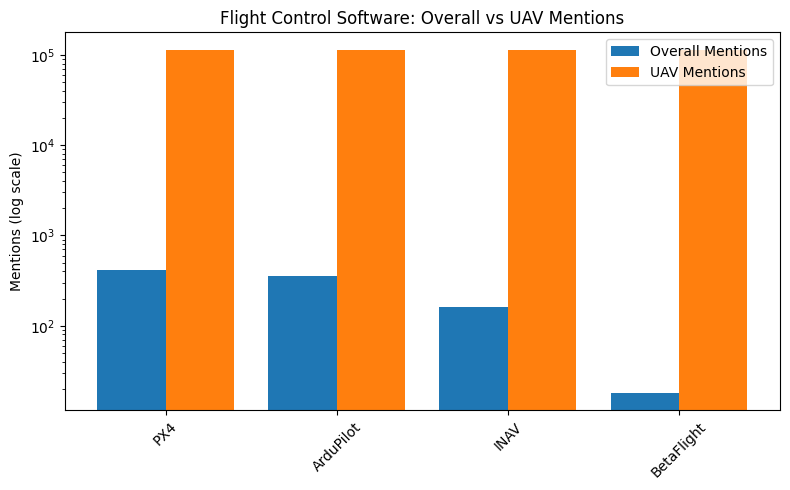

In [125]:
bar_chart_flight_software_by_overall_and_uav_mentions()

PX4 and ArduPilot are the most popular and primarily used for UAVs.

In [126]:
def bar_chart_sims_by_overall_and_uav_mentions():
    plt.figure(figsize=(10, 6))
    x = np.arange(len(simulators_df["Simulator"]))
    plt.bar(
        x - width / 2,
        simulators_df["Overall Mentions"],
        width,
        label="Overall Mentions",
    )
    plt.bar(x + width / 2, simulators_df["UAV Mentions"], width, label="UAV Mentions")

    plt.xticks(x, simulators_df["Simulator"], rotation=45)
    plt.ylabel("Mentions (log scale)")
    plt.yscale("log")
    plt.title("Simulators: Overall vs UAV Mentions")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{folder_to_save_plots}/Simulators: Overall vs UAV Mentions.png")

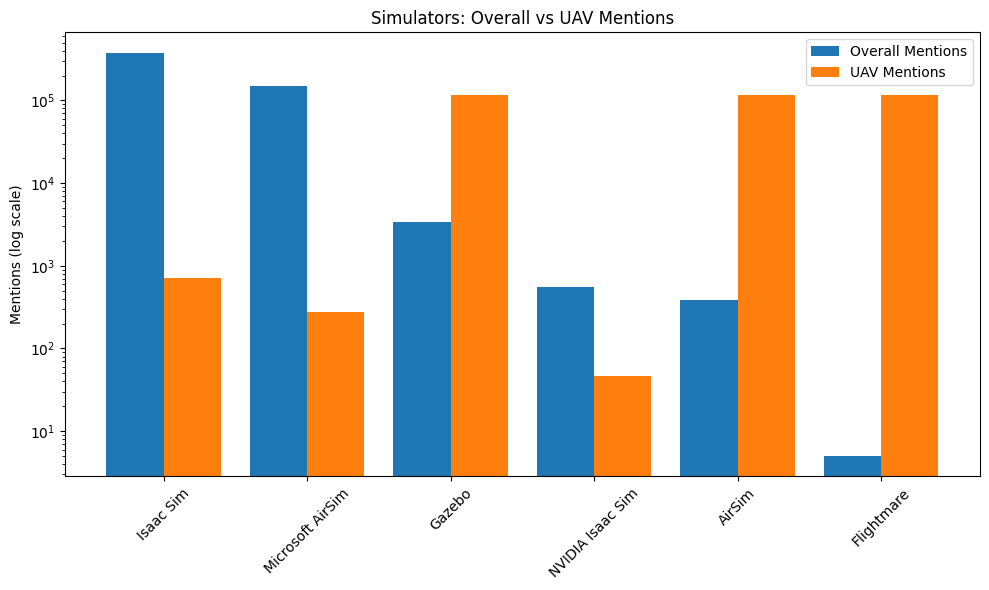

In [127]:
bar_chart_sims_by_overall_and_uav_mentions()

'Isaac Sim' search probably captures also plenty of unrelevant results, since 'NVIDIA Isaac Sim' got half less results. The same seems to happen with 'AirSim' and 'Microsoft AirSim' but to a lesser extent.

Gazebo is old and the most popular simulator in research.

PX4 and ArduPilot are the most popular and primarily used for UAVs.

Flightmare is quiet new and not so wide-spread yet.

In [128]:
def stacked_bar_chart_sim_mentions_with_software_breakdown(
    df, title, index, legend_title
):
    df.set_index(index, inplace=True)
    df.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")

    plt.ylabel("Percentage Mentions")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend(title=legend_title)
    plt.tight_layout()
    plt.savefig(f"{folder_to_save_plots}/{title}.png")

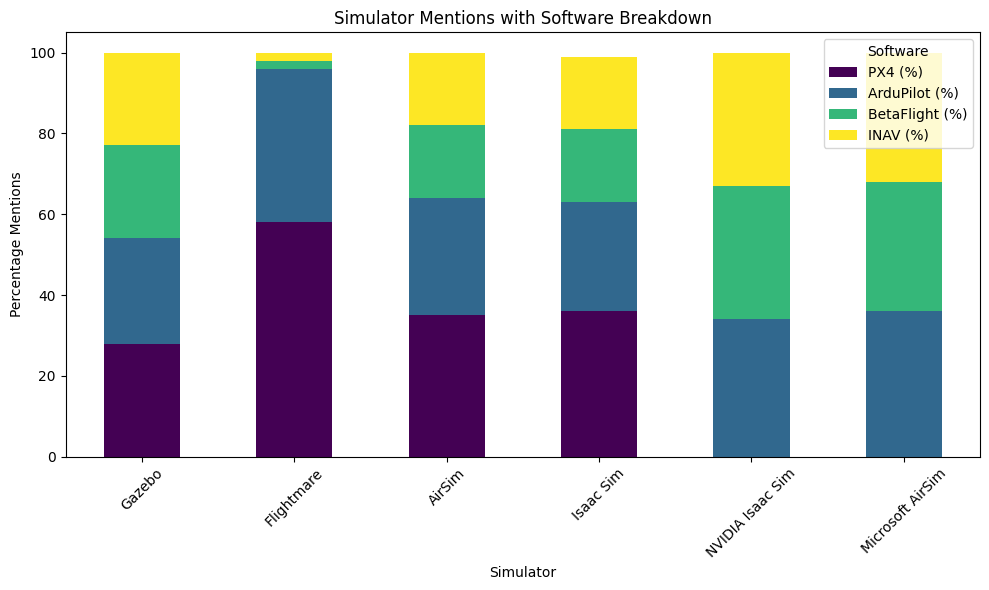

In [129]:
software_simulators_df = pd.DataFrame(get_software_in_simulators())
stacked_bar_chart_sim_mentions_with_software_breakdown(
    software_simulators_df,
    "Simulator Mentions with Software Breakdown",
    index="Simulator",
    legend_title="Software",
)

Most simulators tend to use PX4, with the exception of Microsoft AirSim, which is slightly more commonly coupled with ArduPilot.

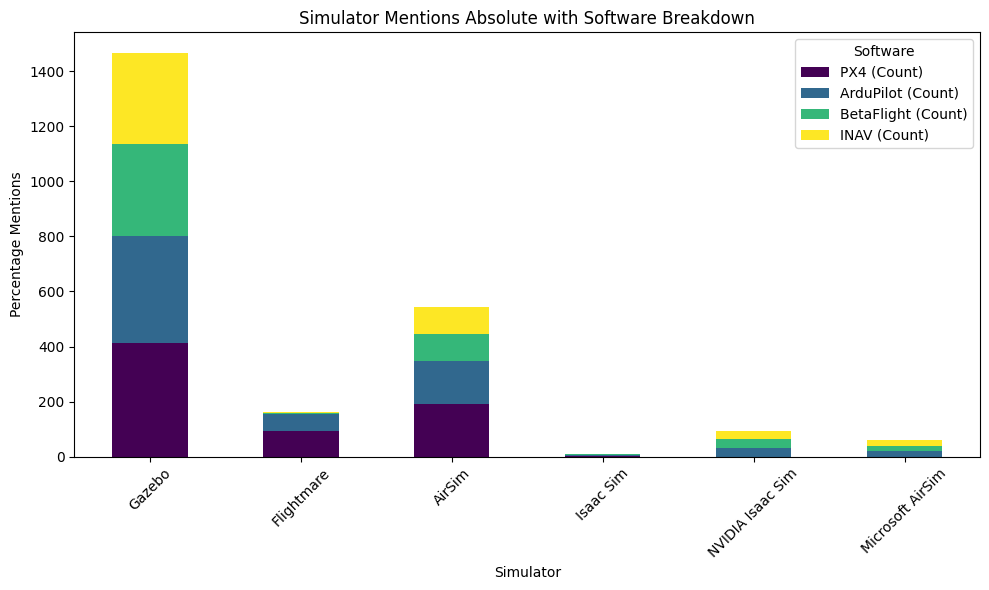

In [130]:
# ABSOLUTE VALUES

software_simulators_df_abs = pd.DataFrame(get_software_in_simulators_absolute())
stacked_bar_chart_sim_mentions_with_software_breakdown(
    software_simulators_df_abs,
    "Simulator Mentions Absolute with Software Breakdown",
    index="Simulator",
    legend_title="Software",
)

This data has a bit different values for simulators than 'Simulators: Overall vs UAV Mentions' plot since the overall count on this plot is a sum of searched flight control software usage (PX4, ArduPilot etc.). So it is expected that there are papers about the simulator and UAVs but without mentions of any of chosen control software.

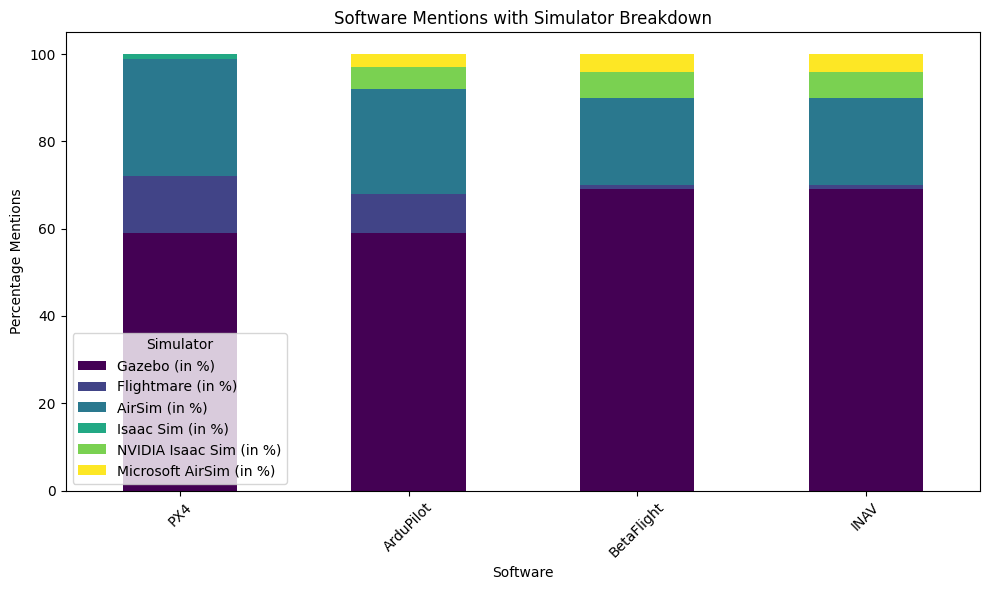

In [131]:
simulators_software_df = pd.DataFrame(get_simulators_in_software())
stacked_bar_chart_sim_mentions_with_software_breakdown(
    simulators_software_df,
    "Software Mentions with Simulator Breakdown",
    index="Software",
    legend_title="Simulator",
)

Most flight software is used on Gazebo.

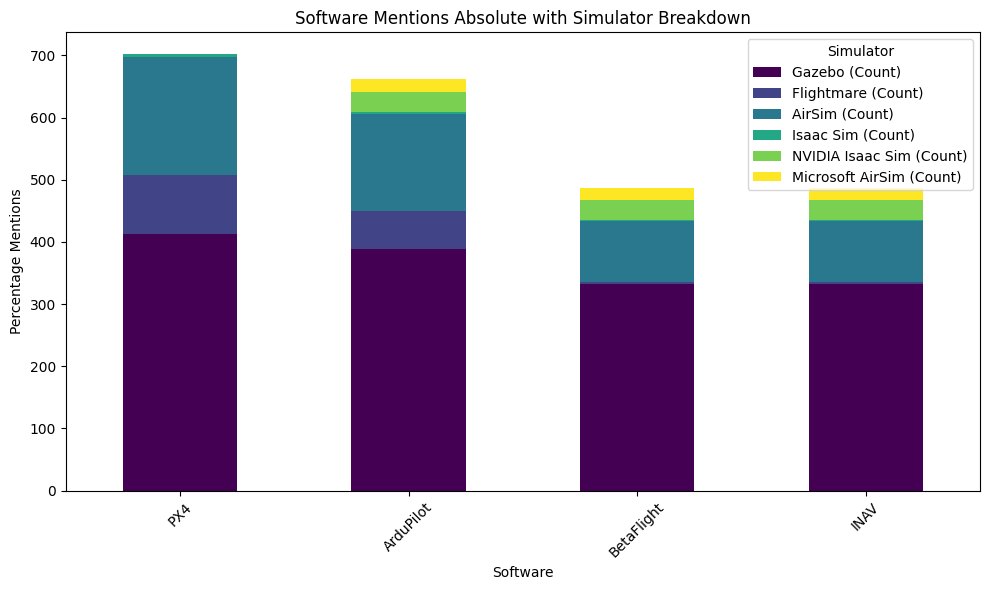

In [132]:
# ABSOLUTE VALUES

simulators_software_df_abs = pd.DataFrame(get_simulators_in_software_absolute())
stacked_bar_chart_sim_mentions_with_software_breakdown(
    simulators_software_df_abs,
    "Software Mentions Absolute with Simulator Breakdown",
    index="Software",
    legend_title="Simulator",
)

INAV and BetaFlight are significantly less popular in research than PX4 and ArduPilot.

In [133]:
def heatmap_software_mentions_across_sims(df, title, xlabel, ylabel, rotate_xs=False):
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        df,
        annot=True,
        fmt="d",
        cmap="YlGnBu",
        linewidths=0.5,
        cbar_kws={"label": "Percentage Mentions"},
    )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.xticks(rotation=45 if rotate_xs else 0)
    plt.savefig(f"{folder_to_save_plots}/{title}.png")

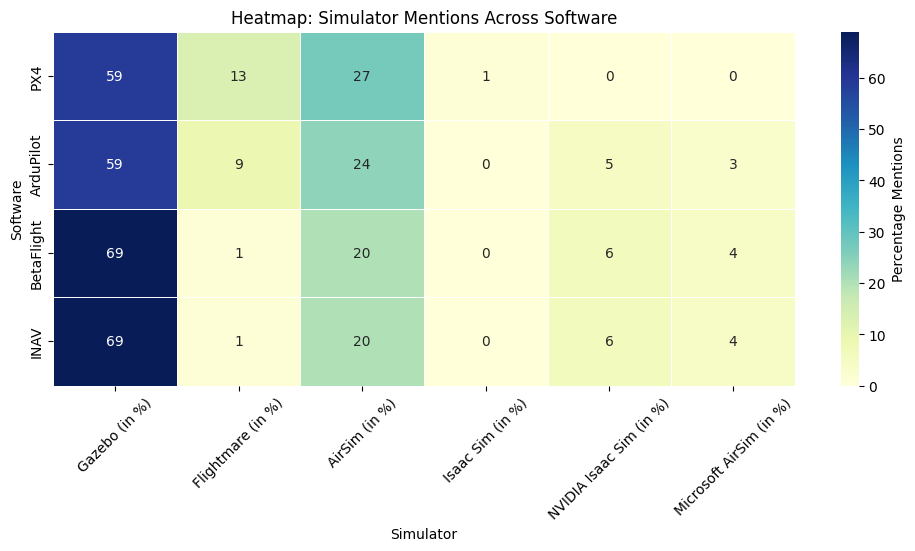

In [134]:
heatmap_software_mentions_across_sims(
    simulators_software_df,
    "Heatmap: Simulator Mentions Across Software",
    xlabel="Simulator",
    ylabel="Software",
    rotate_xs=True,
)

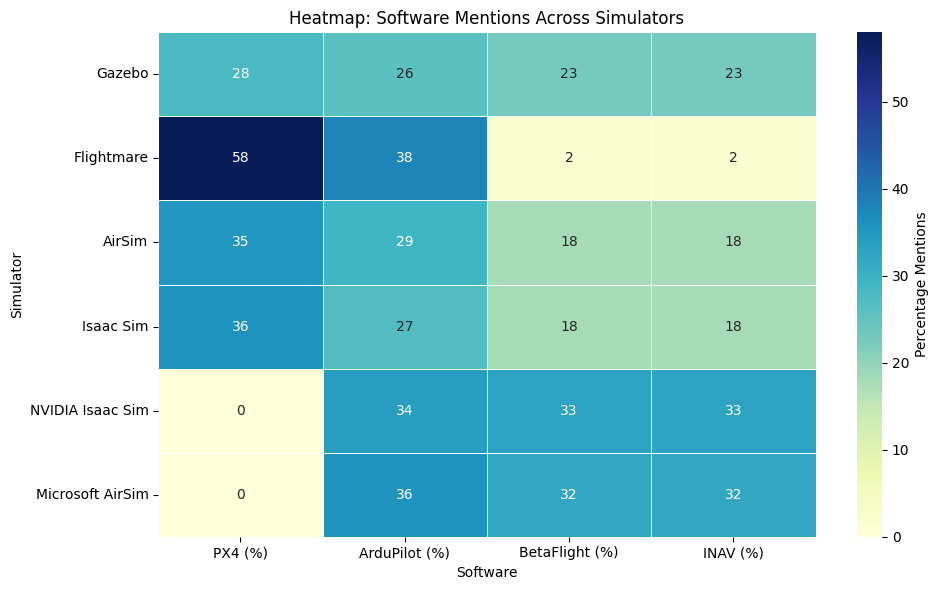

In [135]:
heatmap_software_mentions_across_sims(
    software_simulators_df,
    "Heatmap: Software Mentions Across Simulators",
    xlabel="Software",
    ylabel="Simulator",
)